# Predicting MLB Players Salaries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

In [6]:
batting = pd.read_csv('core/Batting.csv')
pitching = pd.read_csv('core/Pitching.csv')
salaries = pd.read_csv('core/Salaries.csv')
all_star = pd.read_csv('core/AllStarFull.csv')
cpi = pd.read_csv('core/CPI.csv')

# Data Wrangling

In [7]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [8]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,106673.000000,105061.000000,83888.000000,107429.000000,105329.000000,70778.000000,104612.000000,101360.000000,71325.000000,81988.000000
mean,1966.552141,1.079206,51.134098,140.454551,18.639818,36.714863,6.254261,1.260619,2.864785,16.929664,2.948135,1.192960,12.948785,20.677297,1.072664,1.063874,2.225345,1.036775,2.926404
std,39.549982,0.287394,47.015896,184.286687,28.161252,52.399701,9.667879,2.608268,6.396150,26.336778,7.649862,2.699623,20.683452,28.606481,2.731013,2.299923,4.175046,1.943212,4.698823
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1936.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,47.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,80.000000,228.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2019.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [9]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [10]:
salaries.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


After inspection of the Salary data, we see that it only containes salaries 1985 and after

In [11]:
all_star.head()

,playerID,yearID,GP
0,gomezle01,1933.0,1
1,ferreri01,1933.0,1
2,gehrilo01,1933.0,1
3,gehrich01,1933.0,1
4,dykesji01,1933.0,1


In [12]:
all_star.describe()

,yearID,GP
count,5374.000000,5375.000000
mean,1978.629512,0.780465
std,24.866550,0.413970
min,1933.000000,0.000000
25%,1959.000000,1.000000
50%,1979.000000,1.000000
75%,2001.000000,1.000000
max,2019.000000,1.000000


Remove pitchers data

In [13]:
pitchers = np.unique(pitching.playerID)
pitchers = pd.DataFrame(pitchers)

In [14]:
pitchers

,0
0,aardsda01
1,aasedo01
2,abadfe01
3,abbeybe01
4,abbeych01
...,...
9840,zoldasa01
9841,zuberbi01
9842,zumayjo01
9843,zuverge01


In [15]:
pitchers.columns = ['playerID']
all_df = pd.merge(batting, pitchers, how='outer', on='playerID', indicator=True)
batting_stats = all_df[all_df['_merge'] == 'left_only']
batting_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,left_only
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,left_only
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0,left_only
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,...,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0,left_only
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107413,waltodo01,2019,1,SEA,AL,7,16,2,3,0,...,0.0,1.0,3,5.0,0.0,0.0,0.0,0.0,0.0,left_only
107418,wongke01,2019,1,TBA,AL,6,14,1,3,0,...,0.0,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0,left_only
107419,wongke01,2019,2,LAA,AL,1,4,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,left_only
107423,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,...,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0,left_only


Remove any players statistics before the year 1985 and after 2016 because there is no salary data for them

In [16]:
batting_stats = batting_stats[batting_stats.yearID > 1984]
batting_stats = batting_stats[batting_stats.yearID < 2017]
batting_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge
47356,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only
47357,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only
47433,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only
48114,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only
48115,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105967,valaipa01,2016,1,COL,NL,13,19,3,5,1,...,0.0,0.0,0,8.0,0.0,0.0,0.0,0.0,0.0,left_only
105972,vogelda01,2016,1,SEA,AL,8,12,0,1,0,...,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0,left_only
105976,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only
105984,wendljo01,2016,1,OAK,AL,28,96,11,25,1,...,2.0,0.0,6,16.0,0.0,0.0,0.0,2.0,3.0,left_only


In [17]:
batting_sal = pd.merge(batting_stats, salaries)
batting_sal

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,...,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500


In [18]:
batting_sal.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.00000,12329.000000,1.232900e+04
mean,2000.288669,1.006327,96.153703,313.081191,43.153865,83.888799,16.250466,1.799254,9.654068,41.294509,6.254441,2.648796,31.210074,56.718225,2.668748,2.888474,1.912402,2.70395,7.184443,2.285519e+06
std,8.825493,0.085208,46.030116,189.846077,31.403513,56.052862,11.852286,2.291220,10.068848,31.879355,9.887397,3.333790,24.967474,38.026210,4.162843,3.456362,2.908364,2.52469,5.635567,3.749212e+06
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.00000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.00000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,483.000000,67.000000,130.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.00000,11.000000,2.550000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.00000,35.000000,3.300000e+07


Remove any player who made under the minimum salary of 60K since 1985

In [19]:
batting_sal = batting_sal[batting_sal.salary >= 60000]
batting_sal

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,...,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500


Remove any player who never had an AtBat

In [20]:
batting_sal = batting_sal[batting_sal.AB > 0]
batting_sal.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,12312.000000,1.231200e+04
mean,2000.290530,1.006335,96.274204,313.483918,43.207684,83.994883,16.271118,1.801576,9.666748,41.348278,6.263077,2.652453,31.250162,56.793778,2.672352,2.892300,1.914961,2.707602,7.193876,2.288338e+06
std,8.827077,0.085267,45.936800,189.643633,31.387128,56.009908,11.846002,2.291882,10.069822,31.866924,9.891487,3.334636,24.959894,37.997052,4.164577,3.457168,2.909542,2.524502,5.633560,3.751024e+06
min,1985.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.000000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,484.000000,67.000000,131.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.000000,11.000000,2.575000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07


Add AllStar appearences as a feature

In [21]:
all_star['allStar'] = 1
batting_all = pd.merge(batting_sal, all_star, how='left', on=['playerID','yearID'])
batting_all

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,_merge,salary,GP,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858,1.0,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000,NaN,NaN
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000,NaN,NaN
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000,NaN,NaN
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12308,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500,NaN,NaN
12309,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500,NaN,NaN
12310,storytr01,2016,1,COL,NL,97,372,67,101,21,...,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500,NaN,NaN
12311,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500,NaN,NaN


In [22]:
batting_all = batting_all.fillna({'allStar':0})
batting_all

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SO,IBB,HBP,SH,SF,GIDP,_merge,salary,GP,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858,1.0,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000,NaN,0.0
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000,NaN,0.0
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000,NaN,0.0
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12308,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500,NaN,0.0
12309,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500,NaN,0.0
12310,storytr01,2016,1,COL,NL,97,372,67,101,21,...,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500,NaN,0.0
12311,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500,NaN,0.0


Add amount of years played in MLB as a feature

In [23]:
batting_all['Years Played'] = batting_all.groupby('playerID').cumcount() + 1
batting_all.sort_values(by=['playerID', 'yearID'])

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,_merge,salary,GP,allStar,Years Played
8921,abadan01,2006,1,CIN,NL,5,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,left_only,327000,NaN,0.0,1
7298,abbotje01,1998,1,CHA,AL,89,244,33,68,14,...,1.0,0.0,2.0,5.0,2.0,left_only,175000,NaN,0.0,1
7299,abbotje01,1999,1,CHA,AL,17,57,5,9,0,...,0.0,0.0,1.0,1.0,4.0,left_only,255000,NaN,0.0,2
7300,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,1.0,2.0,2.0,1.0,2.0,left_only,255000,NaN,0.0,3
7301,abbotje01,2001,1,FLO,NL,28,42,5,11,3,...,0.0,1.0,0.0,0.0,1.0,left_only,300000,NaN,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,zuninmi01,2014,1,SEA,AL,131,438,51,87,20,...,1.0,17.0,0.0,4.0,12.0,left_only,504100,NaN,0.0,1
12176,zuninmi01,2015,1,SEA,AL,112,350,28,61,11,...,0.0,5.0,8.0,2.0,6.0,left_only,523500,NaN,0.0,2
4984,zupcibo01,1991,1,BOS,AL,18,25,3,4,0,...,0.0,0.0,1.0,0.0,0.0,left_only,100000,NaN,0.0,1
4985,zupcibo01,1992,1,BOS,AL,124,392,46,108,19,...,1.0,4.0,7.0,4.0,6.0,left_only,109000,NaN,0.0,2


In [45]:
batting_all['AVG'] = batting_all.H / batting_all.AB 
batting_all.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,IBB,HBP,SH,SF,GIDP,salary,GP,allStar,Years Played,AVG
count,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,...,12313.000000,12313.000000,12313.000000,12313.000000,12313.000000,1.231300e+04,1238.000000,12313.000000,12313.000000,12313.000000
mean,2000.291481,1.006335,96.278080,313.499147,43.209859,84.000000,16.271827,1.801511,9.667587,41.351336,...,2.672298,2.892634,1.914805,2.707545,7.194835,2.288194e+06,0.900646,0.100544,5.092910,0.251905
std,8.827349,0.085263,45.936948,189.643461,31.386782,56.010511,11.845782,2.291800,10.069844,31.867436,...,4.164412,3.457226,2.909475,2.524408,5.634336,3.750906e+06,0.299257,0.300736,3.822381,0.055393
min,1985.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000e+05,1.000000,0.000000,2.000000,0.230032
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,...,1.000000,2.000000,1.000000,2.000000,6.000000,6.250000e+05,1.000000,0.000000,4.000000,0.258004
75%,2008.000000,1.000000,138.000000,484.000000,67.000000,131.000000,25.000000,3.000000,14.000000,62.000000,...,4.000000,4.000000,3.000000,4.000000,11.000000,2.575000e+06,1.000000,0.000000,7.000000,0.283113
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,...,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07,1.000000,1.000000,24.000000,1.000000


Salary adjustment using CPI data from BLS database

In [55]:
salary_adj = pd.merge(batting_all, cpi, how='left', on='yearID')
salary_adj['salary2016'] = (240/salary_adj.CPI)*salary_adj.salary
salary_adj['min_salary2016'] =(240/salary_adj.CPI)*salary_adj.min_salary
salary_adj.head()

KeyError: 'yearID'

# EDA

Text(0.5, 1.0, 'PDF of ')

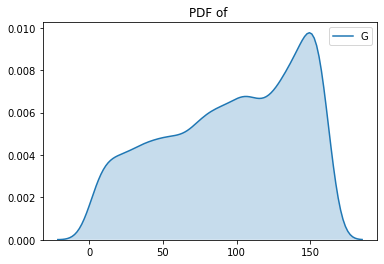

In [46]:
sns.kdeplot(batting_all.G, shade=True)
plt.title("PDF of Games Played")

Text(0.5, 1.0, 'PDF of ')

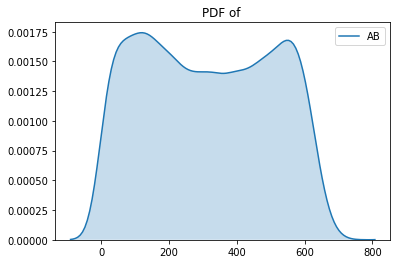

In [47]:
sns.kdeplot(batting_all.AB, shade=True)
plt.title("PDF of At Bats")

Text(0.5, 1.0, 'PDF of ')

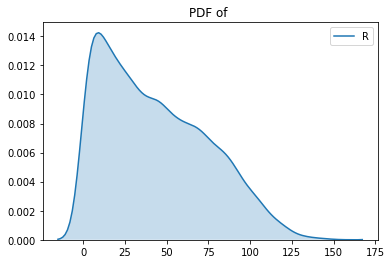

In [48]:
sns.kdeplot(batting_all.R, shade=True)
plt.title("PDF of Runs Scored")

Text(0.5, 1.0, 'PDF of ')

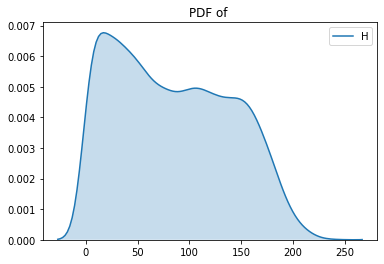

In [49]:
sns.kdeplot(batting_all.H, shade=True)
plt.title("PDF of Total Hits")

Text(0.5, 1.0, 'PDF of ')

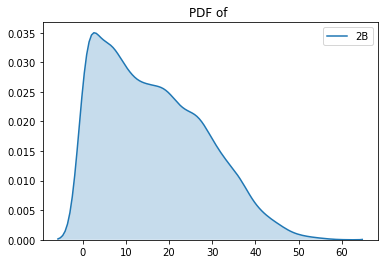

In [50]:
sns.kdeplot(batting_all['2B'], shade=True)
plt.title("PDF of Doubles")

Text(0.5, 1.0, 'PDF of ')

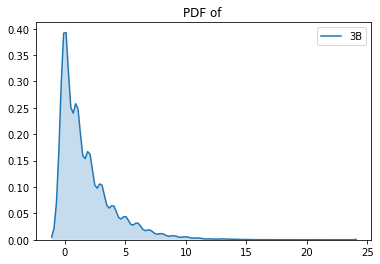

In [51]:
sns.kdeplot(batting_all['3B'], shade=True)
plt.title("PDF of Triples")

Text(0.5, 1.0, 'PDF of ')

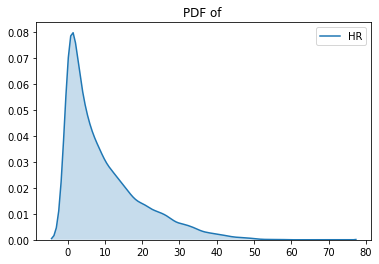

In [52]:
sns.kdeplot(batting_all['HR'], shade=True)
plt.title("PDF of Home Runs")

Text(0.5, 1.0, 'PDF of ')

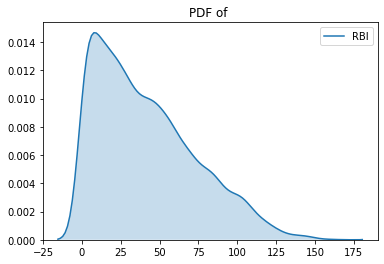

In [53]:
sns.kdeplot(batting_all['RBI'], shade=True)
plt.title("PDF of Runs Batted In")

Text(0.5, 1.0, 'PDF of ')

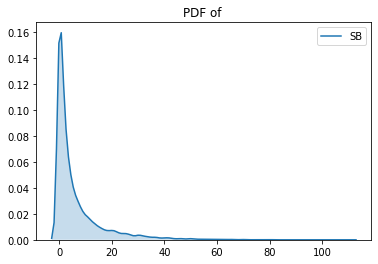

In [54]:
sns.kdeplot(batting_all['SB'], shade=True)
plt.title("PDF of Stolen Bases")

Text(0.5, 1.0, 'PDF of ')

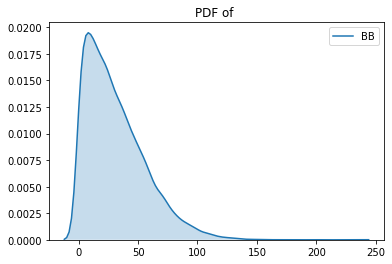

In [55]:
sns.kdeplot(batting_all['BB'], shade=True)
plt.title("PDF of Walks")

Text(0.5, 1.0, 'PDF of ')

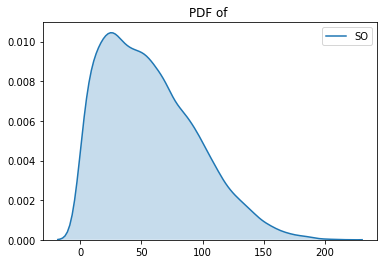

In [56]:
sns.kdeplot(batting_all['SO'], shade=True)
plt.title("PDF of Strikeouts")

Text(0.5, 1.0, 'PDF of ')

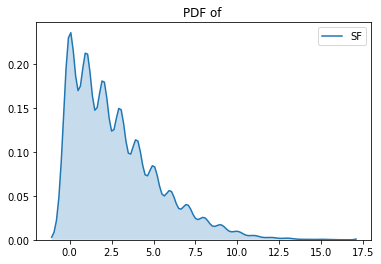

In [57]:
sns.kdeplot(batting_all['SF'], shade=True)
plt.title("PDF of Sacrifice Flys")

Text(0.5, 1.0, 'PDF of ')

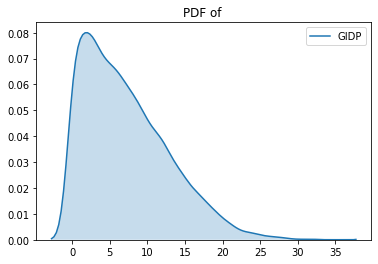

In [58]:
sns.kdeplot(batting_all['GIDP'], shade=True)
plt.title("PDF of Ground into Double Play")

Text(0.5, 1.0, 'PDF of ')

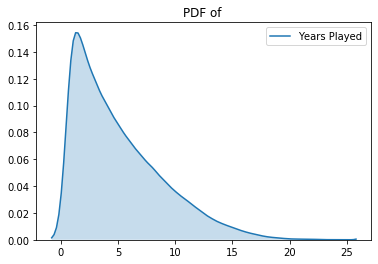

In [59]:
sns.kdeplot(batting_all['Years Played'], shade=True)
plt.title("PDF of Years Played")

Text(0.5, 1.0, 'PDF of ')

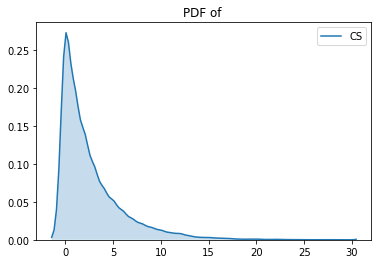

In [60]:
sns.kdeplot(batting_all['CS'], shade=True)
plt.title("PDF of Caught Stealing")

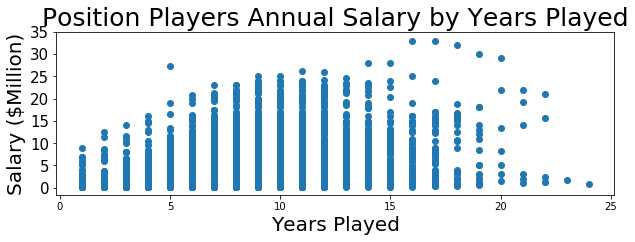

In [33]:
plt.figure(figsize=(10,3))
plt.scatter(batting_all['Years Played'], batting_all.salary)
plt.xlabel('Years Played', size=20)
plt.ylabel('Salary ($Million)', size=20)
plt.yticks(np.arange(40000000,step=5000000),(0,5,10,15,20,25,30,35), size=15)
plt.title('Position Players Annual Salary by Years Played', size=25);

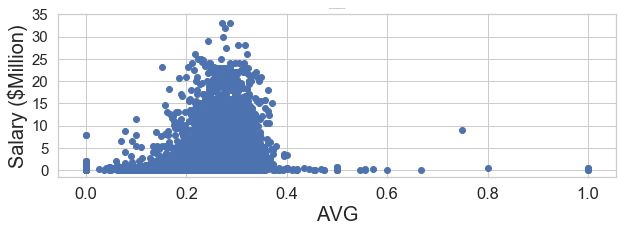

In [47]:
plt.figure(figsize=(10,3))
plt.scatter(batting_all['AVG'], batting_all.salary)
plt.xlabel('AVG', size=20)
plt.ylabel('Salary ($Million)', size=20)
plt.yticks(np.arange(40000000,step=5000000),(0,5,10,15,20,25,30,35), size=15)
plt.title('Position Players Annual Salary by AVG', size=1);

In [54]:
cols = ['salary', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SF', 'SH',
               'GIDP', 'AVG']
corr = batting_all[cols].corr()
corr.style.background_gradient().set_precision(2)

,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SF,SH,GIDP,AVG
salary,1.00,0.27,0.33,0.35,0.34,0.34,0.03,0.40,0.39,0.05,0.01,0.37,0.31,0.31,0.24,0.27,-0.14,0.34,0.18
G,0.27,1.00,0.95,0.88,0.92,0.85,0.50,0.66,0.83,0.44,0.50,0.77,0.79,0.46,0.49,0.66,0.26,0.72,0.47
AB,0.33,0.95,1.00,0.93,0.98,0.91,0.54,0.71,0.88,0.48,0.52,0.78,0.81,0.47,0.51,0.69,0.23,0.76,0.48
R,0.35,0.88,0.93,1.00,0.95,0.89,0.55,0.78,0.89,0.54,0.54,0.85,0.78,0.51,0.53,0.66,0.17,0.67,0.51
H,0.34,0.92,0.98,0.95,1.00,0.92,0.54,0.71,0.89,0.49,0.52,0.78,0.76,0.50,0.50,0.69,0.20,0.76,0.55
2B,0.34,0.85,0.91,0.89,0.92,1.00,0.44,0.70,0.87,0.38,0.41,0.74,0.73,0.48,0.50,0.67,0.11,0.71,0.51
3B,0.03,0.50,0.54,0.55,0.54,0.44,1.00,0.22,0.36,0.58,0.56,0.37,0.40,0.15,0.22,0.29,0.29,0.24,0.29
HR,0.40,0.66,0.71,0.78,0.71,0.70,0.22,1.00,0.90,0.16,0.18,0.72,0.75,0.58,0.45,0.57,-0.18,0.57,0.37
RBI,0.39,0.83,0.88,0.89,0.89,0.87,0.36,0.90,1.00,0.28,0.31,0.79,0.78,0.58,0.49,0.73,-0.02,0.73,0.48
SB,0.05,0.44,0.48,0.54,0.49,0.38,0.58,0.16,0.28,1.00,0.78,0.38,0.33,0.12,0.21,0.23,0.32,0.16,0.25


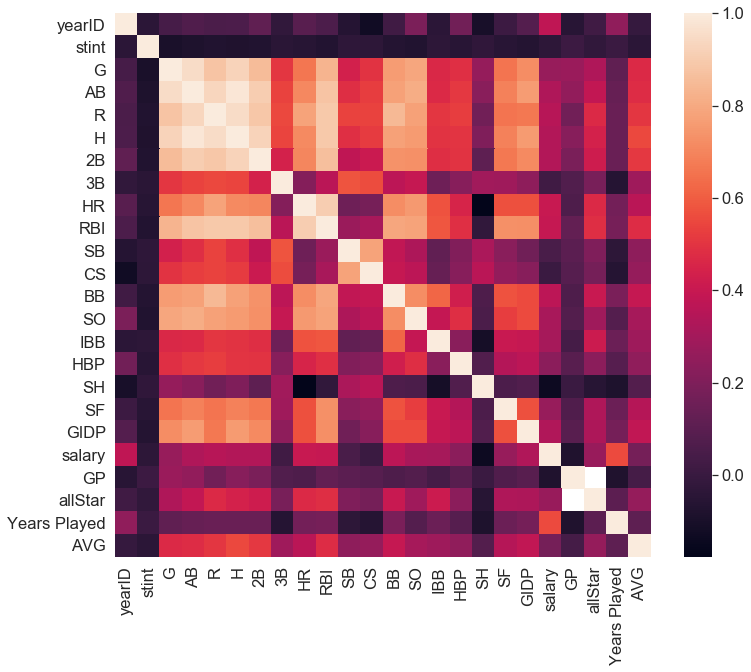

In [49]:
plt.subplots(figsize=(12,10))
sns.heatmap(batting_all.corr());

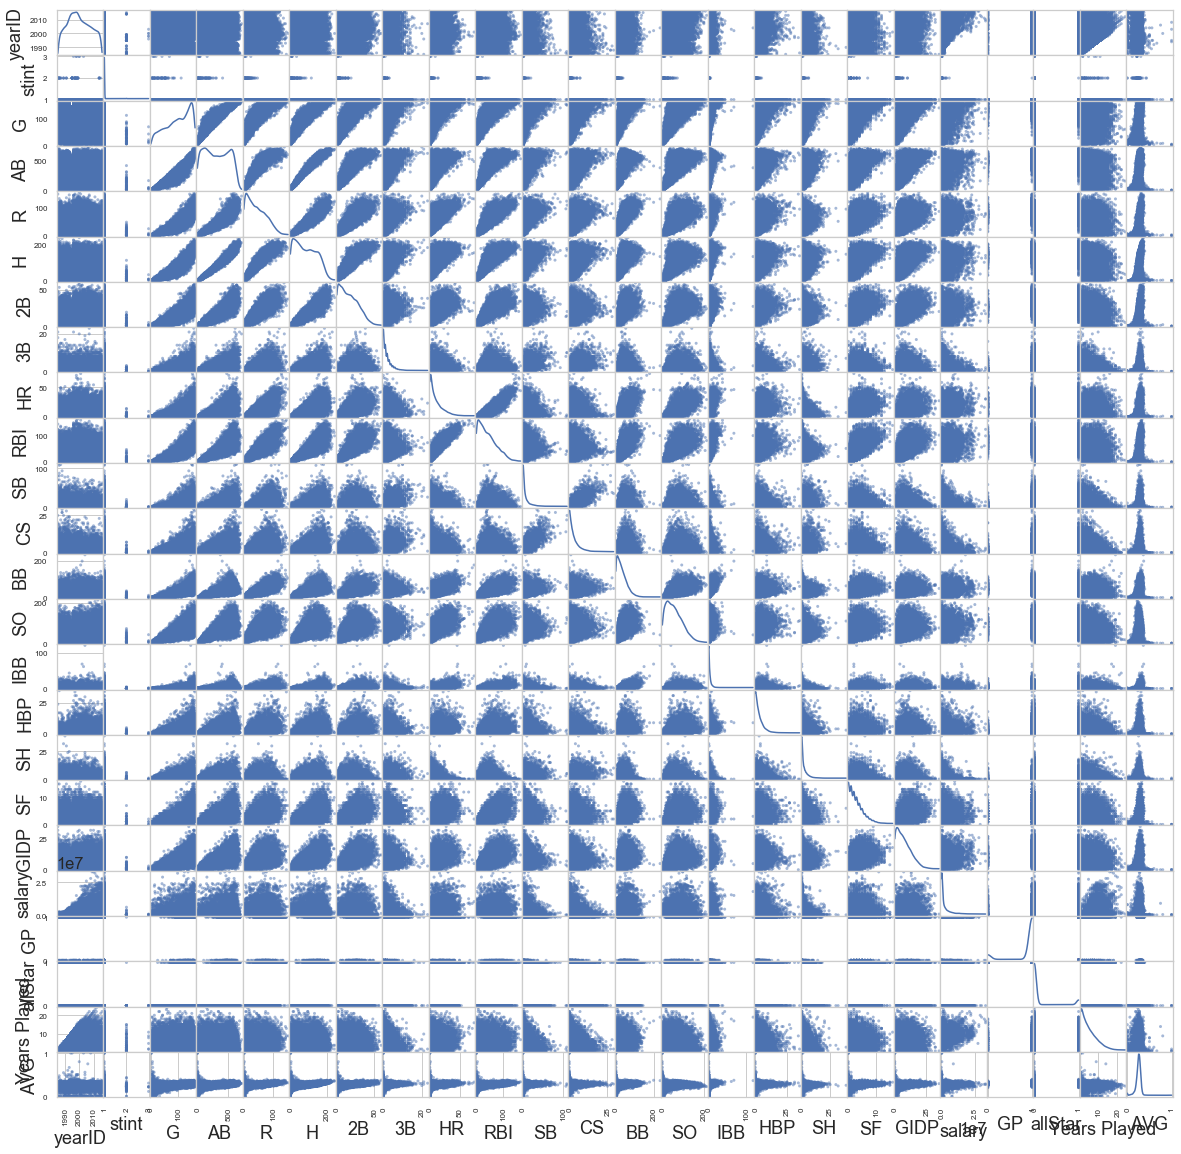

In [50]:
pd.plotting.scatter_matrix(batting_all,figsize=[20, 20], alpha=0.5, diagonal='kde');

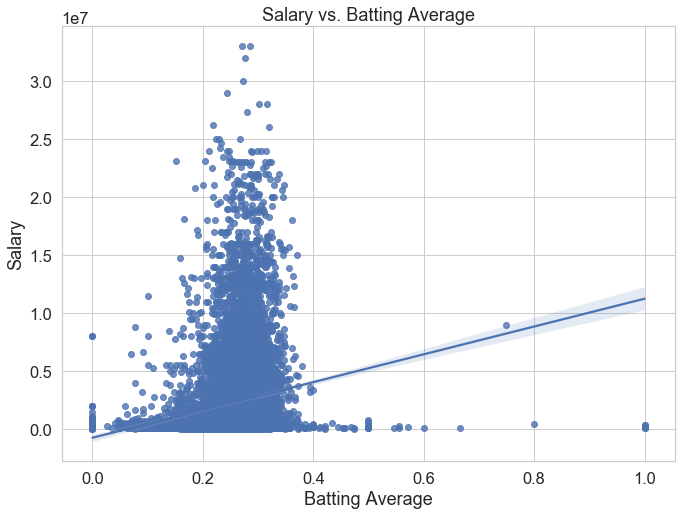

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


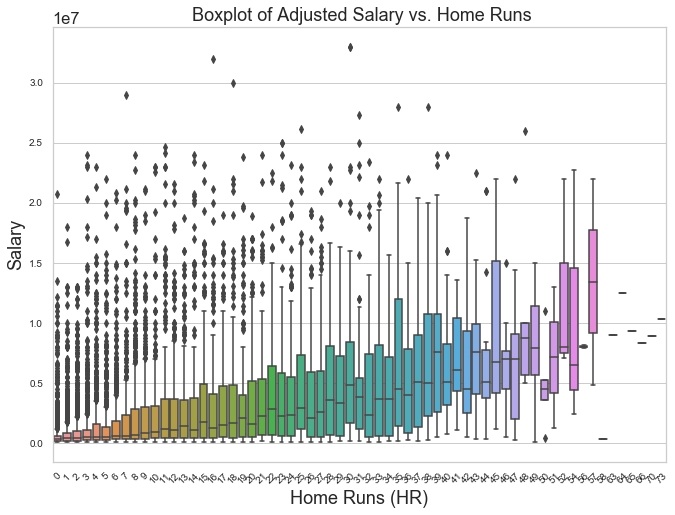

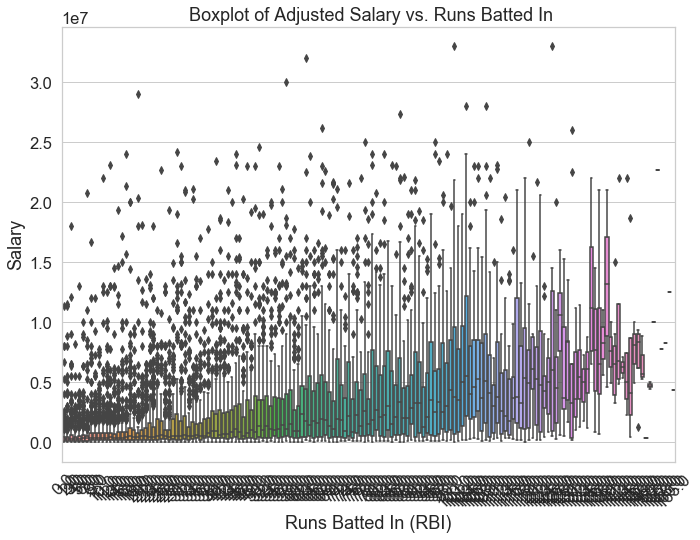

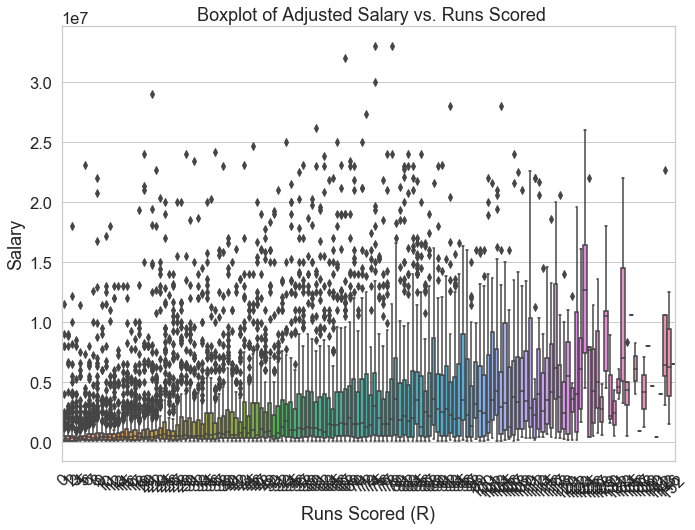

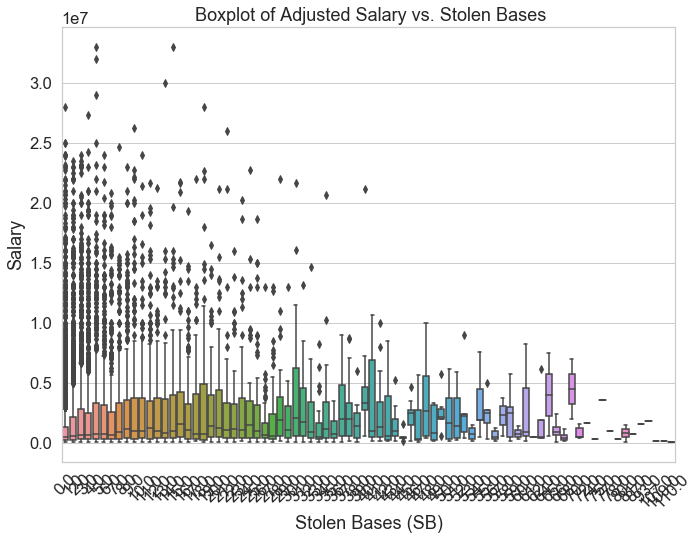

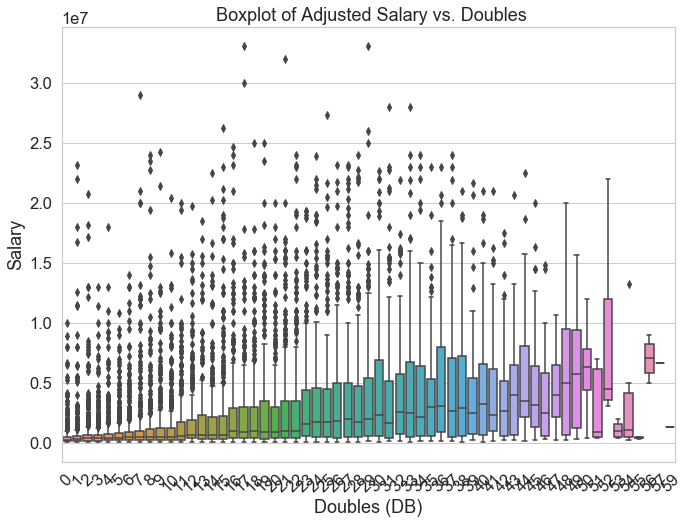

In [52]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

sns.regplot(x="AVG", y="salary", data=batting_all)
plt.title('Salary vs. Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Salary')
plt.show()

sns.boxplot(x="HR",y="salary", data=batting_all)
plt.title(' Boxplot of Adjusted Salary vs. Home Runs')
plt.xlabel('Home Runs (HR)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tick_params(labelsize=10)
ax = plt.axes()
plt.show()

sns.boxplot(x="RBI",y="salary", data=batting_all)
plt.title(' Boxplot of Adjusted Salary vs. Runs Batted In')
plt.xlabel('Runs Batted In (RBI)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="R",y="salary", data=batting_all)
plt.title(' Boxplot of Adjusted Salary vs. Runs Scored')
plt.xlabel('Runs Scored (R)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="SB", y="salary", data=batting_all)
plt.title(' Boxplot of Adjusted Salary vs. Stolen Bases')
plt.xlabel('Stolen Bases (SB)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="2B", y="salary", data=batting_all)
plt.title(' Boxplot of Adjusted Salary vs. Doubles')
plt.xlabel('Doubles (DB)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


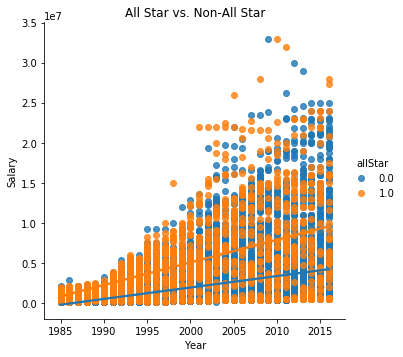

In [78]:
sns.lmplot(x='yearID',
            y='salary',
            hue = 'allStar',
            data=batting_all)
plt.title('All Star vs. Non-All Star')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

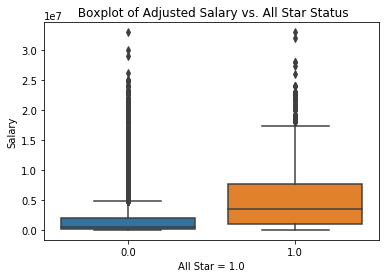

In [84]:
sns.boxplot(x="allStar", y="salary", data=batting_all)
plt.title(' Boxplot of Adjusted Salary vs. All Star Status')
plt.xlabel('All Star = 1.0')
plt.ylabel('Salary')
plt.show()

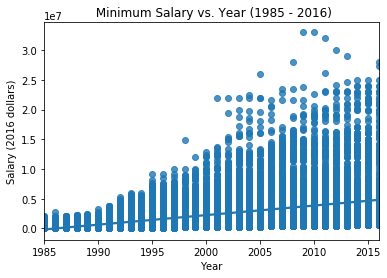

In [85]:
sns.regplot(x='yearID',
            y='salary',
           data=batting_all)
plt.title(' Minimum Salary vs. Year (1985 - 2016)')
plt.xlabel('Year')
plt.ylabel('Salary (2016 dollars)')
plt.show()